### Introduction

#### The goal of our project is to build a binary classification model which can predict the class label of the variable `y` given by our business user into classes of 0 or 1. Our dataset contains `160000` observations with 50 features, most of which are numeric data and few categorical features. We have cleaned our dataset before running through the model which is explained in detail . The workflow is as follows : 

1. Import dataset into dataframe
2. Exploratory Data Analysis
3. Create Tidy Set
4. Model Architecture - Stacking
5. Model building / Hyperparameter optimization
6. Evaluate Model performance and Report results.

FP = -$500, FN = -$10000 


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# linear classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# ensemble learners
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
data =pd.read_csv("/Users/ramya/Desktop/final_project.csv",header=0)# 160001

In [4]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [6]:
data.shape

(160000, 51)

In [7]:
df = data

In [8]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [9]:
df = df.rename(columns={'x24': 'region', 'x29': 'month','x30': 'day','x32': 'rate','x37': 'PL'})
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'region', 'x25', 'x26', 'x27', 'x28', 'month',
       'day', 'x31', 'rate', 'x33', 'x34', 'x35', 'x36', 'PL', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'y'],
      dtype='object')

In [10]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'region', 'x25', 'x26', 'x27', 'x28', 'month',
       'day', 'x31', 'rate', 'x33', 'x34', 'x35', 'x36', 'PL', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'y'],
      dtype='object')

In [11]:
df = df.replace(to_replace='',value=np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0        159974 non-null float64
x1        159975 non-null float64
x2        159962 non-null float64
x3        159963 non-null float64
x4        159974 non-null float64
x5        159963 non-null float64
x6        159974 non-null float64
x7        159973 non-null float64
x8        159979 non-null float64
x9        159970 non-null float64
x10       159957 non-null float64
x11       159970 non-null float64
x12       159964 non-null float64
x13       159969 non-null float64
x14       159966 non-null float64
x15       159965 non-null float64
x16       159974 non-null float64
x17       159973 non-null float64
x18       159960 non-null float64
x19       159965 non-null float64
x20       159962 non-null float64
x21       159971 non-null float64
x22       159973 non-null float64
x23       159953 non-null float64
region    159972 non-null object
x25       159978 non-null float64
x26   

In [12]:
## Count of nan's in each column in the dataset
count_nan = len(df) - df.count()
count_nan

x0        26
x1        25
x2        38
x3        37
x4        26
x5        37
x6        26
x7        27
x8        21
x9        30
x10       43
x11       30
x12       36
x13       31
x14       34
x15       35
x16       26
x17       27
x18       40
x19       35
x20       38
x21       29
x22       27
x23       47
region    28
x25       22
x26       36
x27       30
x28       35
month     30
day       30
x31       39
rate      31
x33       41
x34       41
x35       30
x36       27
PL        23
x38       31
x39       23
x40       36
x41       40
x42       26
x43       37
x44       40
x45       29
x46       31
x47       37
x48       32
x49       32
y          0
dtype: int64

In [13]:
df_na = df[pd.isnull(df).any(axis=1)]

In [14]:
#df=df.dropna()
#df.info()
df_na['y'].describe() ### distro after secluding na's 
#df['y'].describe() ## distro before dropping 

## distro of y before and after dropping na rows is same , hence we prefer to drop the rows with na . 

count    1608.000000
mean        0.404851
std         0.491016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

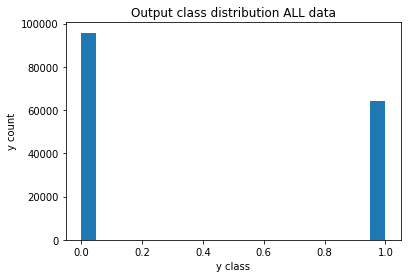

In [15]:
df.y.plot.hist(stacked=True, bins=20,figsize=[6,4])
plt.ylabel('y count')
plt.xlabel('y class')
plt.title('Output class distribution ALL data')
plt.show()

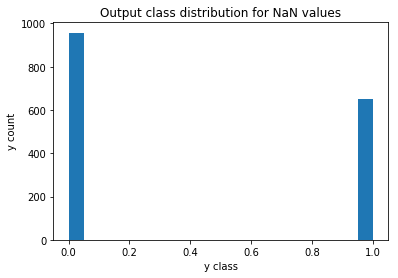

In [16]:
df_na.y.plot.hist(stacked=True, bins=20, figsize=[6,4])
plt.ylabel('y count')
plt.xlabel('y class')
plt.title('Output class distribution for NaN values')
plt.show()

In [17]:
df1 = df.dropna()
df1=df1.reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 52 columns):
index     158392 non-null int64
x0        158392 non-null float64
x1        158392 non-null float64
x2        158392 non-null float64
x3        158392 non-null float64
x4        158392 non-null float64
x5        158392 non-null float64
x6        158392 non-null float64
x7        158392 non-null float64
x8        158392 non-null float64
x9        158392 non-null float64
x10       158392 non-null float64
x11       158392 non-null float64
x12       158392 non-null float64
x13       158392 non-null float64
x14       158392 non-null float64
x15       158392 non-null float64
x16       158392 non-null float64
x17       158392 non-null float64
x18       158392 non-null float64
x19       158392 non-null float64
x20       158392 non-null float64
x21       158392 non-null float64
x22       158392 non-null float64
x23       158392 non-null float64
region    158392 non-null object
x25     

In [18]:
df1.drop(['index'], inplace = True, axis =1)
df1

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,-7.250310,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,-15.596731,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,19.780494,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,-26.215235,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,19.267232,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1


In [19]:
df1['rate'].head()

0      0.0%
1    -0.02%
2    -0.01%
3     0.01%
4     0.01%
Name: rate, dtype: object

In [20]:
df1['rate'] = df1['rate'].str.replace("%", "")
df1['rate'] = df1['rate'].astype("float")
df1['rate'].head()

0    0.00
1   -0.02
2   -0.01
3    0.01
4    0.01
Name: rate, dtype: float64

In [21]:
df1['PL'].head()

0     $1313.96
1     $1962.78
2      $430.47
3    $-2366.29
4     $-620.66
Name: PL, dtype: object

In [22]:
df1['PL'] = df1['PL'].str.replace("$", "")
df1['PL'] = df1['PL'].astype("float")
df1['PL'].head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: PL, dtype: float64

In [23]:
df_float = df1.loc[:, df1.dtypes == 'float']
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 47 columns):
x0      158392 non-null float64
x1      158392 non-null float64
x2      158392 non-null float64
x3      158392 non-null float64
x4      158392 non-null float64
x5      158392 non-null float64
x6      158392 non-null float64
x7      158392 non-null float64
x8      158392 non-null float64
x9      158392 non-null float64
x10     158392 non-null float64
x11     158392 non-null float64
x12     158392 non-null float64
x13     158392 non-null float64
x14     158392 non-null float64
x15     158392 non-null float64
x16     158392 non-null float64
x17     158392 non-null float64
x18     158392 non-null float64
x19     158392 non-null float64
x20     158392 non-null float64
x21     158392 non-null float64
x22     158392 non-null float64
x23     158392 non-null float64
x25     158392 non-null float64
x26     158392 non-null float64
x27     158392 non-null float64
x28     158392 non-null f

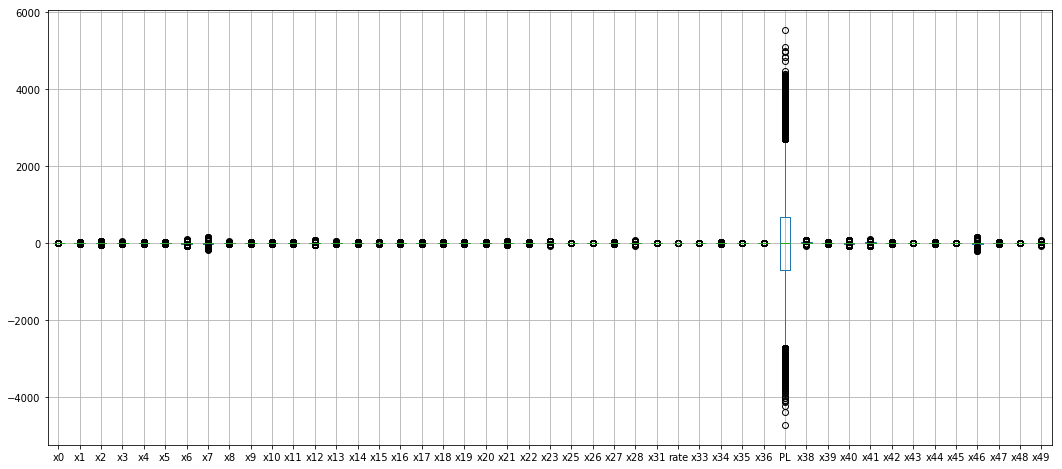

In [24]:
df_float.boxplot(figsize=[18,8])
plt.show()

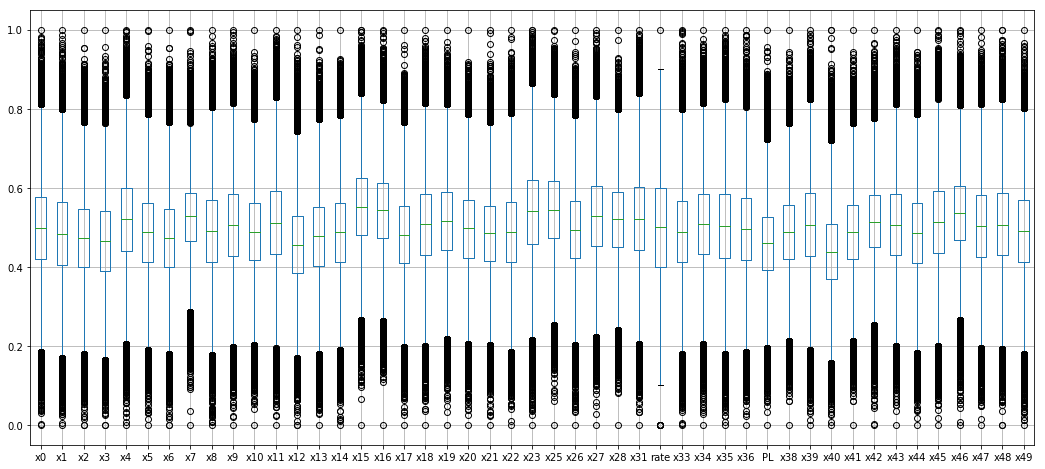

In [25]:
df_norm = (df_float-df_float.min())/(df_float.max()-df_float.min()).astype(float)
df_norm.boxplot(figsize=[18,8])
plt.show()

In [26]:
dummyCols = pd.get_dummies(df1.loc[:, df1.dtypes == 'object'])
dummyCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 20 columns):
region_america    158392 non-null uint8
region_asia       158392 non-null uint8
region_euorpe     158392 non-null uint8
month_Apr         158392 non-null uint8
month_Aug         158392 non-null uint8
month_Dev         158392 non-null uint8
month_Feb         158392 non-null uint8
month_January     158392 non-null uint8
month_July        158392 non-null uint8
month_Jun         158392 non-null uint8
month_Mar         158392 non-null uint8
month_May         158392 non-null uint8
month_Nov         158392 non-null uint8
month_Oct         158392 non-null uint8
month_sept.       158392 non-null uint8
day_friday        158392 non-null uint8
day_monday        158392 non-null uint8
day_thurday       158392 non-null uint8
day_tuesday       158392 non-null uint8
day_wednesday     158392 non-null uint8
dtypes: uint8(20)
memory usage: 3.0 MB


In [27]:
df_norm.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,0.446557,0.411243,0.520704,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0.389523,0.442713,0.659024,0.335659,0.530542,0.435039,0.744595,0.319552,0.516953,0.435302
1,0.451776,0.473453,0.709567,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0.467859,0.650102,0.640781,0.563451,0.661485,0.806781,0.617071,0.386174,0.488725,0.621933
2,0.397975,0.457897,0.582770,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0.449376,0.448907,0.731646,0.456316,0.411634,0.732644,0.659746,0.325781,0.382812,0.436589
3,0.421809,0.577796,0.286681,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0.528866,0.537043,0.404452,0.724121,0.311967,0.634929,0.366905,0.630861,0.615924,0.438086
4,0.413112,0.489890,0.390773,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0.638885,0.374585,0.448676,0.638789,0.592156,0.483935,0.532318,0.498006,0.454349,0.614432


In [28]:
dummyCols.head()
dummyCols.columns

Index(['region_america', 'region_asia', 'region_euorpe', 'month_Apr',
       'month_Aug', 'month_Dev', 'month_Feb', 'month_January', 'month_July',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_sept.', 'day_friday', 'day_monday', 'day_thurday', 'day_tuesday',
       'day_wednesday'],
      dtype='object')

In [29]:
df_norm[['region_america', 'region_asia', 'region_euorpe', 'month_Apr',
       'month_Aug', 'month_Dev', 'month_Feb', 'month_January', 'month_July',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_sept.', 'day_friday', 'day_monday', 'day_thurday', 'day_tuesday',
       'day_wednesday']] = dummyCols
df_norm.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,month_Mar,month_May,month_Nov,month_Oct,month_sept.,day_friday,day_monday,day_thurday,day_tuesday,day_wednesday
0,0.446557,0.411243,0.520704,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0,0,0,0,0,0,0,0,1,0
1,0.451776,0.473453,0.709567,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0,0,0,0,0,0,0,0,0,1
2,0.397975,0.457897,0.582770,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0,0,0,0,0,0,0,0,0,1
3,0.421809,0.577796,0.286681,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0,0,0,0,0,0,0,0,0,1
4,0.413112,0.489890,0.390773,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df_norm[['y']] = df1[['y']]
df_norm.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,month_May,month_Nov,month_Oct,month_sept.,day_friday,day_monday,day_thurday,day_tuesday,day_wednesday,y
0,0.446557,0.411243,0.520704,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0,0,0,0,0,0,0,1,0,0
1,0.451776,0.473453,0.709567,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0,0,0,0,0,0,0,0,1,0
2,0.397975,0.457897,0.582770,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0,0,0,0,0,0,0,0,1,0
3,0.421809,0.577796,0.286681,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0,0,0,0,0,0,0,0,1,0
4,0.413112,0.489890,0.390773,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0,0,0,0,0,0,0,1,0,1


In [31]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 68 columns):
x0                158392 non-null float64
x1                158392 non-null float64
x2                158392 non-null float64
x3                158392 non-null float64
x4                158392 non-null float64
x5                158392 non-null float64
x6                158392 non-null float64
x7                158392 non-null float64
x8                158392 non-null float64
x9                158392 non-null float64
x10               158392 non-null float64
x11               158392 non-null float64
x12               158392 non-null float64
x13               158392 non-null float64
x14               158392 non-null float64
x15               158392 non-null float64
x16               158392 non-null float64
x17               158392 non-null float64
x18               158392 non-null float64
x19               158392 non-null float64
x20               158392 non-null float64
x21    

In [96]:
#df_final = pd.concat([df_norm, dummyCols, df1['y']], axis=1)
#df_final.drop(['day', 'region', 'month'], axis=1, inplace=True)
#df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
x0                158392 non-null float64
x1                158392 non-null float64
x2                158392 non-null float64
x3                158392 non-null float64
x4                158392 non-null float64
x5                158392 non-null float64
x6                158392 non-null float64
x7                158392 non-null float64
x8                158392 non-null float64
x9                158392 non-null float64
x10               158392 non-null float64
x11               158392 non-null float64
x12               158392 non-null float64
x13               158392 non-null float64
x14               158392 non-null float64
x15               158392 non-null float64
x16               158392 non-null float64
x17               158392 non-null float64
x18               158392 non-null float64
x19               158392 non-null float64
x20               158392 non-null float64
x21    

In [32]:
df_norm

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,month_May,month_Nov,month_Oct,month_sept.,day_friday,day_monday,day_thurday,day_tuesday,day_wednesday,y
0,0.446557,0.411243,0.520704,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,...,0,0,0,0,0,0,0,1,0,0
1,0.451776,0.473453,0.709567,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,...,0,0,0,0,0,0,0,0,1,0
2,0.397975,0.457897,0.582770,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,...,0,0,0,0,0,0,0,0,1,0
3,0.421809,0.577796,0.286681,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,...,0,0,0,0,0,0,0,0,1,0
4,0.413112,0.489890,0.390773,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,...,0,0,0,0,0,0,0,1,0,1
5,0.427724,0.693405,0.571218,0.536574,0.479410,0.642025,0.571218,0.500840,0.488827,0.702367,...,0,0,0,0,0,0,0,0,1,0
6,0.363674,0.466283,0.422820,0.452576,0.497162,0.693185,0.422820,0.565631,0.337938,0.470541,...,0,0,0,0,0,0,0,0,1,1
7,0.456418,0.641334,0.428363,0.281573,0.518833,0.350444,0.428363,0.513653,0.605608,0.489100,...,0,0,0,0,0,0,0,0,1,1
8,0.507073,0.377910,0.489418,0.530208,0.608312,0.624520,0.489418,0.625099,0.551745,0.718351,...,1,0,0,0,0,0,0,0,1,0
9,0.389406,0.545685,0.455818,0.454420,0.503828,0.377705,0.455818,0.497599,0.633113,0.675726,...,0,0,0,0,0,0,0,0,1,1


In [33]:
print("The Feature list is: ", df_norm.columns)

The Feature list is:  Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'rate', 'x33',
       'x34', 'x35', 'x36', 'PL', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'region_america',
       'region_asia', 'region_euorpe', 'month_Apr', 'month_Aug', 'month_Dev',
       'month_Feb', 'month_January', 'month_July', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_sept.', 'day_friday',
       'day_monday', 'day_thurday', 'day_tuesday', 'day_wednesday', 'y'],
      dtype='object')


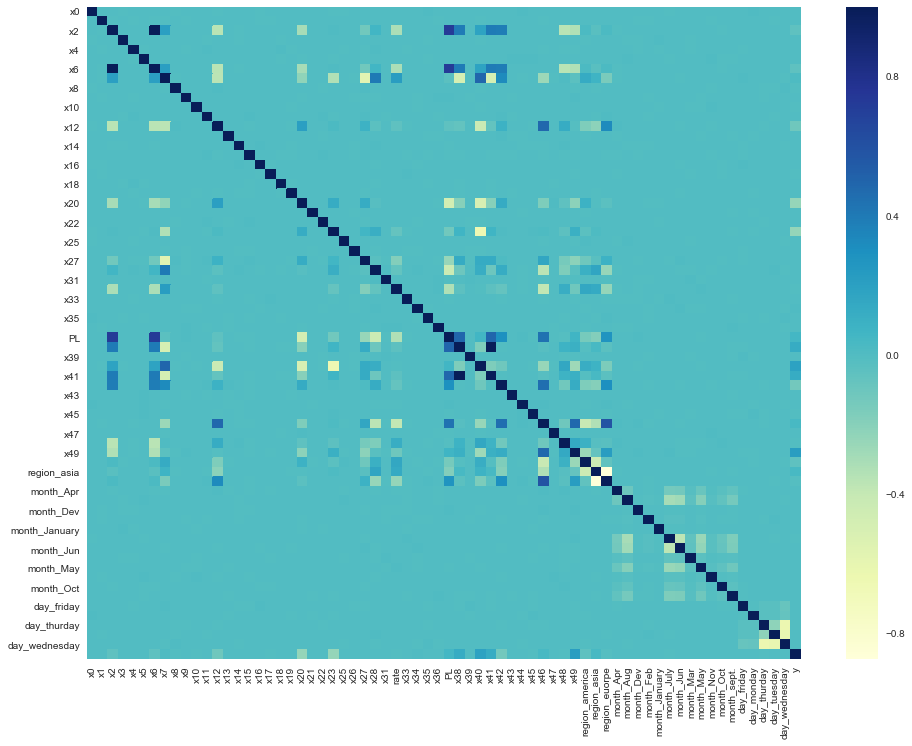

In [34]:
## Heat Map
import seaborn as sns
#sns.palplot(sns.color_palette("husl", 8))
sns.set(rc={'figure.figsize':(16,12)})

corr = df_norm.corr()
sns.heatmap(corr, annot=False, cmap="YlGnBu",
            xticklabels=corr.columns.values)
plt.show()

In [35]:
# x2 is highly correlated with x6 and PL; x39 and X41 are highly correlated; remove them 
df_norm = df_norm.drop(['x2','x41'], axis=1)
#df_norm = df_norm.reset_index()
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 66 columns):
x0                158392 non-null float64
x1                158392 non-null float64
x3                158392 non-null float64
x4                158392 non-null float64
x5                158392 non-null float64
x6                158392 non-null float64
x7                158392 non-null float64
x8                158392 non-null float64
x9                158392 non-null float64
x10               158392 non-null float64
x11               158392 non-null float64
x12               158392 non-null float64
x13               158392 non-null float64
x14               158392 non-null float64
x15               158392 non-null float64
x16               158392 non-null float64
x17               158392 non-null float64
x18               158392 non-null float64
x19               158392 non-null float64
x20               158392 non-null float64
x21               158392 non-null float64
x22    

In [36]:
df_norm

,x0,x1,x3,x4,x5,x6,x7,x8,x9,x10,...,month_May,month_Nov,month_Oct,month_sept.,day_friday,day_monday,day_thurday,day_tuesday,day_wednesday,y
0,0.446557,0.411243,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,0.572294,...,0,0,0,0,0,0,0,1,0,0
1,0.451776,0.473453,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,0.331273,...,0,0,0,0,0,0,0,0,1,0
2,0.397975,0.457897,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,0.510143,...,0,0,0,0,0,0,0,0,1,0
3,0.421809,0.577796,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,0.462025,...,0,0,0,0,0,0,0,0,1,0
4,0.413112,0.489890,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,0.578759,...,0,0,0,0,0,0,0,1,0,1
5,0.427724,0.693405,0.536574,0.479410,0.642025,0.571218,0.500840,0.488827,0.702367,0.487749,...,0,0,0,0,0,0,0,0,1,0
6,0.363674,0.466283,0.452576,0.497162,0.693185,0.422820,0.565631,0.337938,0.470541,0.621827,...,0,0,0,0,0,0,0,0,1,1
7,0.456418,0.641334,0.281573,0.518833,0.350444,0.428363,0.513653,0.605608,0.489100,0.335344,...,0,0,0,0,0,0,0,0,1,1
8,0.507073,0.377910,0.530208,0.608312,0.624520,0.489418,0.625099,0.551745,0.718351,0.505113,...,1,0,0,0,0,0,0,0,1,0
9,0.389406,0.545685,0.454420,0.503828,0.377705,0.455818,0.497599,0.633113,0.675726,0.494127,...,0,0,0,0,0,0,0,0,1,1


##### Do the following on full data before splitting train and test. 
1. Clean data , outliers , any replace variables with correct ones / missing data 
2. data exploration - continuous and discrete feautures
3. Summary of data - min max etc 
4. EDA viz based on region , day - on categorical data 
5. correlation of variables w.r.t y(output)
6. One hot encoding 

##### Then do a train ,validation set split using cross fold . 
###### ensemble of RF , NB , DT , LR,  XGB 


nit1=pd.read_csv("df_final_orig.csv",nrows=128000,header=0)


nit = nit1
nit.drop(nit.columns[0], axis=1,inplace=True)
nit_tgt=nit['y']
nit_data = nit
nit_data.drop(columns= ['y'])

# Hyper Parameter Optimization for Random Forest

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [39]:
x_train = train_data.iloc[0:120000]
x_test = train_data.iloc[120001:158391]
y_train = target_data.iloc[0:120000]
y_test = target_data.iloc[120001:158391]

In [40]:
tuned_parameters={'n_estimators':[50,100,200,250], 'criterion':['gini','entropy'], 'max_depth':[5,10,15],
                 'min_samples_split':[2,4,9]}
scores = ['recall']

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score,n_iter=10)
    clf.fit(train_data, target_data)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for recall



C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: 

C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\NithyaDoss\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: 

# Stacking - Layer one modeling

In [50]:
rf_Kfold=KFold(n_splits=2)
lr_Kfold=KFold(n_splits=4)
dt_Kfold=KFold(n_splits=4)
xgb_Kfold=KFold(n_splits=5)
gnb_Kfold=KFold(n_splits=5)

train_data=df_norm.drop(['y'],axis=1)

target_data= df_norm[['y']]

In [39]:
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 65 columns):
x0                158392 non-null float64
x1                158392 non-null float64
x3                158392 non-null float64
x4                158392 non-null float64
x5                158392 non-null float64
x6                158392 non-null float64
x7                158392 non-null float64
x8                158392 non-null float64
x9                158392 non-null float64
x10               158392 non-null float64
x11               158392 non-null float64
x12               158392 non-null float64
x13               158392 non-null float64
x14               158392 non-null float64
x15               158392 non-null float64
x16               158392 non-null float64
x17               158392 non-null float64
x18               158392 non-null float64
x19               158392 non-null float64
x20               158392 non-null float64
x21               158392 non-null float64
x22    

In [41]:
type(target_data)
target_data.shape
target_data.head()

,y
0,0
1,0
2,0
3,0
4,1


In [42]:
train_data

,x0,x1,x3,x4,x5,x6,x7,x8,x9,x10,...,month_Mar,month_May,month_Nov,month_Oct,month_sept.,day_friday,day_monday,day_thurday,day_tuesday,day_wednesday
0,0.446557,0.411243,0.499468,0.487384,0.499151,0.520704,0.504198,0.477586,0.429486,0.572294,...,0,0,0,0,0,0,0,0,1,0
1,0.451776,0.473453,0.522423,0.637743,0.452568,0.709567,0.528587,0.502828,0.511409,0.331273,...,0,0,0,0,0,0,0,0,0,1
2,0.397975,0.457897,0.555878,0.423334,0.324505,0.582770,0.582377,0.560548,0.457882,0.510143,...,0,0,0,0,0,0,0,0,0,1
3,0.421809,0.577796,0.515346,0.639187,0.520565,0.286681,0.491727,0.486755,0.404863,0.462025,...,0,0,0,0,0,0,0,0,0,1
4,0.413112,0.489890,0.488404,0.573806,0.478661,0.390773,0.632192,0.506780,0.427605,0.578759,...,0,0,0,0,0,0,0,0,1,0
5,0.427724,0.693405,0.536574,0.479410,0.642025,0.571218,0.500840,0.488827,0.702367,0.487749,...,0,0,0,0,0,0,0,0,0,1
6,0.363674,0.466283,0.452576,0.497162,0.693185,0.422820,0.565631,0.337938,0.470541,0.621827,...,0,0,0,0,0,0,0,0,0,1
7,0.456418,0.641334,0.281573,0.518833,0.350444,0.428363,0.513653,0.605608,0.489100,0.335344,...,0,0,0,0,0,0,0,0,0,1
8,0.507073,0.377910,0.530208,0.608312,0.624520,0.489418,0.625099,0.551745,0.718351,0.505113,...,0,1,0,0,0,0,0,0,0,1
9,0.389406,0.545685,0.454420,0.503828,0.377705,0.455818,0.497599,0.633113,0.675726,0.494127,...,0,0,0,0,0,0,0,0,0,1


In [43]:
target_data.shape

(158392, 1)

In [54]:
#Random forest with optimized parameters
rf=RandomForestClassifier(n_estimators=250, min_samples_split = 4, max_depth=15, criterion='gini')
rf_oof_predict=np.zeros(df_norm.shape[0])
for train_idx, test_idx in rf_Kfold.split(df_norm):
    model = rf.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    rf_oof_predict[test_idx]=rf.predict_proba(train_data.iloc[test_idx])[:,1]
    print("Fold RF ROC score is %f" % roc_auc_score(target_data.iloc[test_idx],rf_oof_predict[test_idx]))
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold RF ROC score is 0.966459


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold RF ROC score is 0.966485


In [48]:
trainidx = []
testind = []
for train_idx, test_idx in rf_Kfold.split(df_norm):
    trainidx.append(train_idx)
    testind.append(test_idx)

print(trainidx[0])
print(testind[0])

[ 31679  31680  31681 ... 158389 158390 158391]
[    0     1     2 ... 31676 31677 31678]


# Feature importance

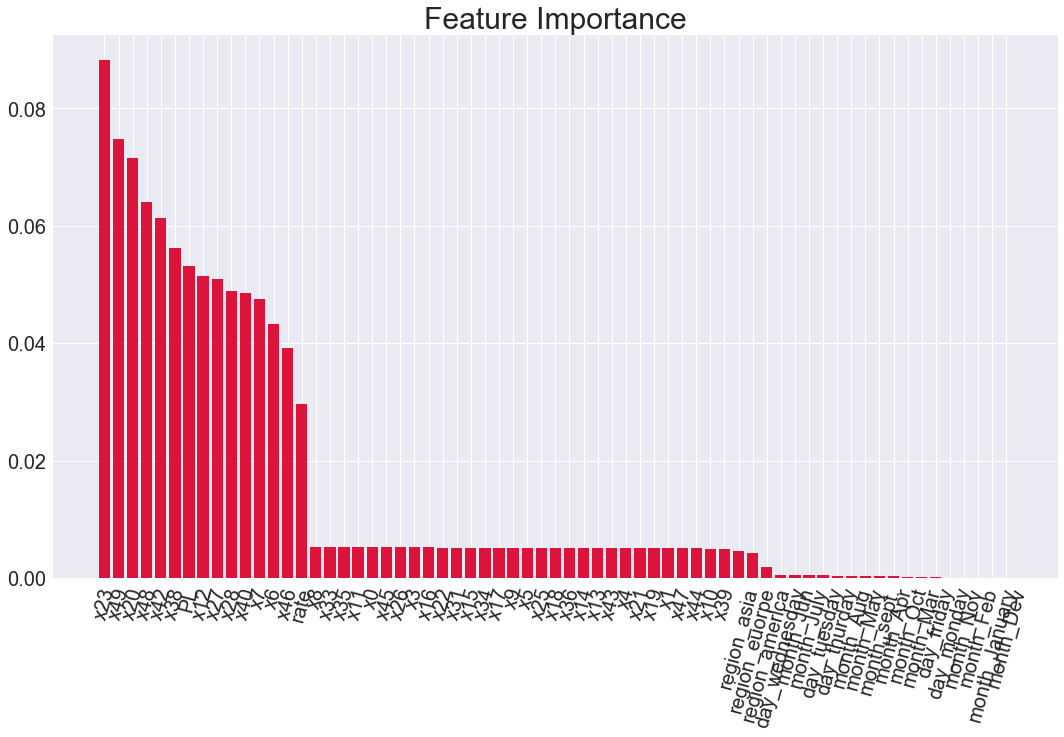

In [58]:
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_norm.columns[i] for i in indices]
#color = finaldata.columns
fig = plt.figure(figsize=(18,10))
# Barplot: Add bars
plt.bar(range(train_data.shape[1]), importances[indices],
        color=('#DC143C'))
#'#DC143C','#DC143C','#DC143C','#DC143C','#DC143C','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9','#A9A9A9'     
# Add feature names as x-axis labels
color = ()
plt.xticks(range(train_data.shape[1]), names, rotation=75, fontsize = 20)
plt.yticks(fontsize = 20)
## Create plot title
plt.title("Feature Importance", fontsize=30)
# Show plot
plt.show()

In [46]:
lr=LogisticRegression()
lr_oof_predict=np.zeros(df_norm.shape[0])
for train_idx, test_idx in lr_Kfold.split(df_norm):
    lr.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    lr_oof_predict[test_idx]=lr.predict_proba(train_data.iloc[test_idx])[:,1]
    print("Fold LR ROC score is %f" % roc_auc_score(target_data.iloc[test_idx],lr_oof_predict[test_idx])) 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold LR ROC score is 0.756973
Fold LR ROC score is 0.759200
Fold LR ROC score is 0.759353
Fold LR ROC score is 0.760865


In [47]:
dt= DecisionTreeClassifier()
dt_oof_predict=np.zeros(df_norm.shape[0])
for train_idx, test_idx in dt_Kfold.split(df_norm):
    dt.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    dt_oof_predict[test_idx]=dt.predict_proba(train_data.iloc[test_idx])[:,1]
    print("Fold DT ROC score is %f" % roc_auc_score(target_data.iloc[test_idx],dt_oof_predict[test_idx]))
    

Fold DT ROC score is 0.839869
Fold DT ROC score is 0.839171
Fold DT ROC score is 0.840184
Fold DT ROC score is 0.840153


In [75]:
xgb= XGBClassifier(objective='binary:logistic')
xgb_oof_predict=np.zeros(df_norm.shape[0])
for train_idx, test_idx in xgb_Kfold.split(df_norm):
    xgb.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    xgb_oof_predict[test_idx]=xgb.predict_proba(train_data.iloc[test_idx])[:,1]
    print("Fold XGB ROC score is %f" % roc_auc_score(target_data.iloc[test_idx],xgb_oof_predict[test_idx]))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold XGB ROC score is 0.908825


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold XGB ROC score is 0.912449


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold XGB ROC score is 0.913638


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold XGB ROC score is 0.914364


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold XGB ROC score is 0.908374


In [49]:
gnb= GaussianNB()
gnb_oof_predict=np.zeros(df_norm.shape[0])
for train_idx, test_idx in gnb_Kfold.split(df_norm):
    gnb.fit(train_data.iloc[train_idx],target_data.iloc[train_idx])
    gnb_oof_predict[test_idx]=gnb.predict_proba(train_data.iloc[test_idx])[:,1]
    print("Fold GNB ROC score is %f" % roc_auc_score(target_data.iloc[test_idx],gnb_oof_predict[test_idx]))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold GNB ROC score is 0.733811
Fold GNB ROC score is 0.737742
Fold GNB ROC score is 0.742389
Fold GNB ROC score is 0.742521
Fold GNB ROC score is 0.746077


In [50]:
rf_oof_predict
xgb_oof_predict

array([0.19746779, 0.12549959, 0.22374696, ..., 0.62771016, 0.11064082,
       0.92320985])

#### In stage 2 we will pass the oof predictions of RF and XGB to NN and RF to find out how the model performs .

In [51]:
stage2 = XGBClassifier()

In [52]:
stage2_data=pd.DataFrame({'RF_data':rf_oof_predict,'XGB_data':xgb_oof_predict})

In [53]:
stage2_data

,RF_data,XGB_data
0,0.183388,0.197468
1,0.083968,0.125500
2,0.089232,0.223747
3,0.447555,0.318502
4,0.972953,0.899871
5,0.048995,0.068852
6,0.426119,0.406987
7,0.759237,0.722124
8,0.227192,0.125955
9,0.765804,0.650824


In [54]:
stage2_data_train = stage2_data.iloc[0:120000]
stage2_data_test = stage2_data.iloc[120001:158391]

stage2_data_train
stage2_data_test
#stage2.fit(stage2_data,target_data)

,RF_data,XGB_data
120001,0.145776,0.298982
120002,0.387183,0.404536
120003,0.234649,0.129517
120004,0.043394,0.027977
120005,0.154410,0.183032
120006,0.837958,0.767245
120007,0.565882,0.579951
120008,0.957223,0.912515
120009,0.913847,0.892205
120010,0.105981,0.099988


In [55]:
target_data2 = target_data.iloc[0:120000]
target_data2

,y
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,1
8,0
9,1


In [56]:
target_data_test = target_data.iloc[120001:158391]
target_data_test

,y
120001,0
120002,0
120003,0
120004,0
120005,0
120006,1
120007,1
120008,1
120009,1
120010,0


# Hyper parameter optimization for XGBoost

Reference: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [61]:
tuned_parameters={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
scores = ['recall']

In [62]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=250, objective='binary:logistic',
                    silent=True, nthread=1)

In [63]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(xgb, tuned_parameters, cv=5,
                       scoring='%s_macro' % score,n_iter=10)
    clf.fit(stage2_data_train, target_data2)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = target_data_test, clf.predict(stage2_data_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for recall



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an err

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an err

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best parameters set found on development set:

{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 1.0}

Grid scores on development set:

0.916 (+/-0.004) for {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 1.0}
0.893 (+/-0.004) for {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 0.6}
0.918 (+/-0.003) for {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}
0.893 (+/-0.004) for {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 0.8}
0.894 (+/-0.002) for {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 0.6}
0.918 (+/-0.003) for {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 1.0}
0.895 (+/-0.002) for {'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}
0.89

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Fitting the XGBoost model with tuned parameters

In [64]:
stage2 = XGBClassifier(learning_rate=0.01, n_estimators=250, objective='binary:logistic',
                    silent=True, nthread=1, subsample=1.0, min_child_weight=1, max_depth=4, gamma= 1.5, colsample_bytree=1.0)
stage2.fit(stage2_data_train,target_data2)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=1.5, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=250, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

In [65]:
y_pred=stage2.predict(stage2_data_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [66]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(target_data_test, y_pred))

Accuracy: 0.9223495702005731


In [67]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_data_test, y_pred, average='macro')

(0.9194242134637327, 0.9186599476298692, 0.9190372529122146, None)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_data_test, y_pred)

array([[21587,  1449],
       [ 1532, 13822]])

In [69]:
print("Stage2 RF ROC score is %f" % roc_auc_score(target_data_test,y_pred))

Stage2 RF ROC score is 0.918660


# Voting Classifier - combining Random Forest and XG Boost

In [76]:
vClassifiers = [('Random Forest', rf), ('XGB Classifier', xgb), ('Decision Tree', dt)]

In [73]:
X_train = train_data.iloc[0:120000]
X_test = train_data.iloc[120001:158391]
y_train = target_data.iloc[0:120000]
y_test = target_data.iloc[120001:158391]

In [77]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=vClassifiers, voting='soft')     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)
y_pred_proba = vc.predict_proba(X_test)[:,1]

# Calculate roc_auc_score
vc_roc_auc_score = roc_auc_score(y_test, y_pred_proba) 
print('Voting Classifier: {:.3f}'.format(vc_roc_auc_score))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Voting Classifier: 0.949


In [70]:
print('Thank You!')

Thank You!
